In [43]:
# Librerías e importaciones
import pandas as pd
import os
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

In [44]:
# Resultados en un diccionario
results = [
    {'Modelo': 'Logistic Baseline', 'Accuracy': 0.85, 'F1': 0.47, 'AUC': 0.73},
    {'Modelo': 'Random Forest', 'Accuracy': 0.89, 'F1': 0.64, 'AUC': 0.82},
    {'Modelo': 'XGBoost', 'Accuracy': 0.91, 'F1': 0.67, 'AUC': 0.85},
]
df_results = pd.DataFrame(results)
display(df_results)

,Modelo,Accuracy,F1,AUC
0,Logistic Baseline,0.85,0.47,0.73
1,Random Forest,0.89,0.64,0.82
2,XGBoost,0.91,0.67,0.85


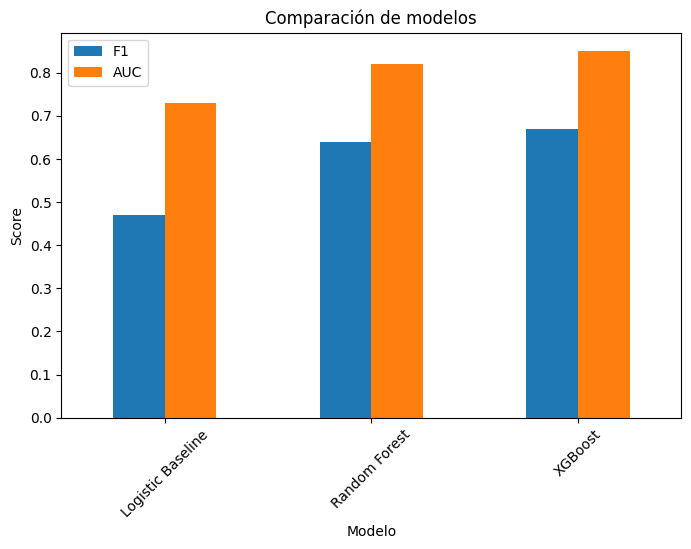

In [45]:
# Gráfico de comparación
ax = df_results.set_index('Modelo')[['F1', 'AUC']].plot(kind='bar', figsize=(8,5))
plt.title('Comparación de modelos')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

In [46]:
# Cargar modelos y preparar datos de test para la curva ROC
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split

rf = joblib.load('../models/random_forest.pkl')
xgb = joblib.load('../models/xgb_best.pkl')
df = pd.read_csv('../data/raw/bank_marketing.csv')
df['Class'] = df['Class'].map({'no': 0, 'yes': 1, 1: 0, 2: 1, 0: 0})
df = df.loc[~df['Class'].isnull(), :]
y = df['Class']
X = df.drop('Class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_test_enc = pd.get_dummies(X_test)
columns = joblib.load('../models/xgb_columns.pkl')
X_test_enc = X_test_enc.reindex(columns=columns, fill_value=0)

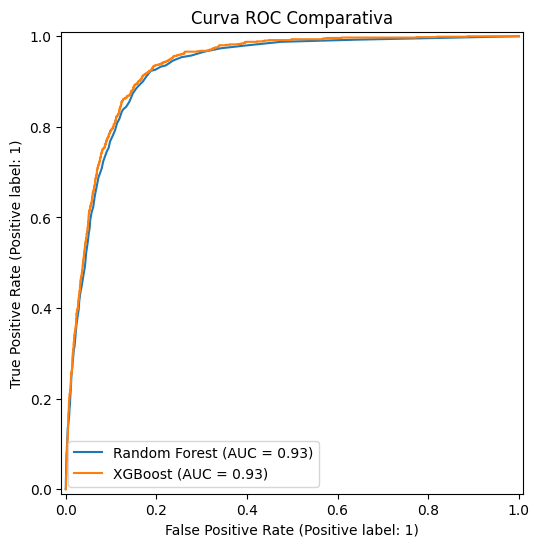

In [48]:
# Cargar modelos y preparar datos de test para la curva ROC
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

rf = joblib.load('../models/random_forest.pkl')
xgb = joblib.load('../models/xgb_best.pkl')
df = pd.read_csv('../data/raw/bank_marketing.csv')
df['Class'] = df['Class'].map({'no': 0, 'yes': 1, 1: 0, 2: 1, 0: 0})
df = df.loc[~df['Class'].isnull(), :]
y = df['Class']
X = df.drop('Class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_test_enc = pd.get_dummies(X_test)
columns = joblib.load('../models/xgb_columns.pkl')
X_test_enc = X_test_enc.reindex(columns=columns, fill_value=0)

# Curva ROC comparativa
plt.figure(figsize=(8,6))
ax = plt.gca()
RocCurveDisplay.from_estimator(rf, X_test_enc, y_test, ax=ax, name='Random Forest')
RocCurveDisplay.from_estimator(xgb, X_test_enc, y_test, ax=ax, name='XGBoost')
plt.title('Curva ROC Comparativa')
plt.legend()
plt.show()